In [128]:
import pandas as pd
# membaca data dari file csv dengan menyertakan parameter delimeter
#df = pd.read_excel('/content/drive/MyDrive/BAHAN TESIS MILA/udah dinamain.xlsx')
#df

In [129]:
import pandas as pd
# membaca data dari file csv dengan menyertakan parameter delimeter
df = pd.read_excel('dataset/fix_dataset.xlsx')
df

,Unnamed: 0.1,Unnamed: 0,author,authorIsChannelOwner,channelId,channelName,channelUrl,cid,comment,comments,...,text,thumbnailUrl,title,type,url,videoId,viewCount,voteCount,nama_channel,Labeling
0,0,0,NaN,NaN,UCpTDLjtApqi9yAfHMDfVQIA,CVT Indonesia,https://www.youtube.com/@CVTIndonesia,NaN,NaN,NaN,...,NaN,NaN,PENASARAN SAMA MOBIL YANG DIPAGERAN INI? INI D...,shorts,https://www.youtube.com/shorts/57M48weGsSk,NaN,6700.0,NaN,Unknown,NaN
1,1,1,@MelvilleAlbert-h2j,0.0,NaN,NaN,NaN,Ugy0ll_PA3Vyar5HKKl4AaABAg,Harris Sarah Moore Maria Lopez John,NaN,...,NaN,NaN,Suzuki EVX Concept 2024 | First Impression | O...,comment,NaN,TrS87tu1lJ8,NaN,0.0,OtoDriver,netral
2,2,2,@inspirasitanparugi,0.0,NaN,NaN,NaN,Ugw4r_yUJlWl4WnDT-54AaABAg,Good Product for Suzuki Mobil ....Saya penggia...,NaN,...,NaN,NaN,Suzuki EVX Concept 2024 | First Impression | O...,comment,NaN,TrS87tu1lJ8,NaN,0.0,OtoDriver,positif
3,3,3,@dediksetiawan1287,0.0,NaN,NaN,NaN,UgwZQDF3JVn7TEE5lN94AaABAg,Eksterior & interiornya keren banget....sangat...,NaN,...,NaN,NaN,Suzuki EVX Concept 2024 | First Impression | O...,comment,NaN,TrS87tu1lJ8,NaN,0.0,OtoDriver,positif
4,4,4,@wisnudrajad,0.0,NaN,NaN,NaN,UgzfXB9RO5ZTXj9jUn94AaABAg,Mobil konsep = php,NaN,...,NaN,NaN,Suzuki EVX Concept 2024 | First Impression | O...,comment,NaN,TrS87tu1lJ8,NaN,0.0,OtoDriver,negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,262,262,@AI-ih4gt,0.0,NaN,NaN,NaN,UgzNVhIduP6GltAtOQh4AaABAg,Ahh baru concept rilisnya jauh😂😂😂,NaN,...,NaN,NaN,"SUZUKI SIAP BANTAI MOBIL CINA, Siapkan Mobil L...",comment,NaN,uXs-5eCfCHI,NaN,0.0,Carmudi,negatif
263,263,263,@dikoandara9563,0.0,NaN,NaN,NaN,UgxY34vZCexMiKGmtdN4AaABAg,Headunit nya ganggu pandangan banget seperti nya,NaN,...,NaN,NaN,"SUZUKI SIAP BANTAI MOBIL CINA, Siapkan Mobil L...",comment,NaN,uXs-5eCfCHI,NaN,0.0,Carmudi,negatif
264,264,264,@giansukmoro4376,0.0,NaN,NaN,NaN,Ugzcw90itMy606cOVL94AaABAg,Kayaknya ini bukan bikinan Suzuki India deh..,NaN,...,NaN,NaN,"SUZUKI SIAP BANTAI MOBIL CINA, Siapkan Mobil L...",comment,NaN,uXs-5eCfCHI,NaN,0.0,Carmudi,positif
265,265,265,@tanpanama281,0.0,NaN,NaN,NaN,UgzXY7yjX-xMFljNnbB4AaABAg.A60JHIMe8rCA649tw5gdRV,maklum indo pajaknya besar bang untuk unit import,NaN,...,NaN,NaN,Suzuki eVX Concept | GIIAS 2024,reply,NaN,q1QA0VVSDwY,NaN,0.0,AutoNetMagz,netral


In [130]:
data = df[['comment', 'Labeling ']]
data = data.iloc[1:,:]
data.head()

,comment,Labeling
1,Harris Sarah Moore Maria Lopez John,netral
2,Good Product for Suzuki Mobil ....Saya penggia...,positif
3,Eksterior & interiornya keren banget....sangat...,positif
4,Mobil konsep = php,negatif
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral


**PROSES SENTIMEN ANALISIS**

 **1.PREPROCESSING**

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle
import re
import seaborn as sn

%matplotlib inline

In [132]:
!pip -q install sastrawi

**2.CASEFOLDING**

In [133]:
# Fungsi casefolding
def casefolding(text):
    if isinstance(text, str):  # Pastikan hanya string yang diproses
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Menghapus karakter non-alphabet
    return text

# Terapkan casefolding dengan memastikan setiap nilai diubah menjadi string
data["casefolding"] = data["comment"].apply(lambda x: casefolding(str(x)))

# Tampilkan data
data.head()


,comment,Labeling,casefolding
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good product for suzuki mobil saya penggiat mo...
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interiornya keren bangetsangat futu...
4,Mobil konsep = php,negatif,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabarnya tahun depan suzuki bakal luncurin mob...


**3. NORMALISASI KATA**

In [134]:
# key_norm = pd.read_csv("/content/drive/MyDrive/BAHAN TESIS MILA/key_norm (1).csv")
key_norm = pd.read_csv('dataset/key_norm (1).csv')
def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text
data['textnormalize'] = data['casefolding'].apply(text_normalize)
data.head()

,comment,Labeling,casefolding,textnormalize
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good product for suzuki mobil saya penggiat mo...,good produk untuk suzuki mobil saya penggiat m...
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interiornya keren bangetsangat futu...,eksterior interiornya keren bangetsangat futur...
4,Mobil konsep = php,negatif,mobil konsep php,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabarnya tahun depan suzuki bakal luncurin mob...,kabarnya tahun depan suzuki bakal luncurin mob...


**4. Stopwords Removal**

In [135]:
# download Stopwords bahasa indonesia
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [137]:
import pandas as pd

# Membuat DataFrame dari daftar stopwords
stopwords_df = pd.DataFrame(stopwords_ind, columns=['stopwords'])

# Menyimpan DataFrame ke dalam file CSV
stopwords_df.to_csv('stopwords_indonesian.csv', index=False)

In [138]:
def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)
data['stopwordremoval'] = data['textnormalize'].apply(remove_stop_words)
data.head()

,comment,Labeling,casefolding,textnormalize,stopwordremoval
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john,harris sarah moore maria lopez john,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good product for suzuki mobil saya penggiat mo...,good produk untuk suzuki mobil saya penggiat m...,good produk suzuki mobil penggiat mobil suzuki
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interiornya keren bangetsangat futu...,eksterior interiornya keren bangetsangat futur...,eksterior interiornya keren bangetsangat futur...
4,Mobil konsep = php,negatif,mobil konsep php,mobil konsep php,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabarnya tahun depan suzuki bakal luncurin mob...,kabarnya tahun depan suzuki bakal luncurin mob...,kabarnya suzuki luncurin mobil rakit indonesia...


**5. Stemming**

In [139]:
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Set up the stemming factory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    return stemmer.stem(text)

# Tambahkan support untuk tqdm pada pandas
tqdm.pandas()

# Terapkan stemming dengan tqdm untuk melihat progress
data['stemming'] = data['stopwordremoval'].progress_apply(stemming)

# Lihat hasilnya
data.head()

100%|██████████| 266/266 [01:23<00:00,  3.20it/s]


,comment,Labeling,casefolding,textnormalize,stopwordremoval,stemming
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john,harris sarah moore maria lopez john,harris sarah moore maria lopez john,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good product for suzuki mobil saya penggiat mo...,good produk untuk suzuki mobil saya penggiat m...,good produk suzuki mobil penggiat mobil suzuki,good produk suzuki mobil giat mobil suzuki
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interiornya keren bangetsangat futu...,eksterior interiornya keren bangetsangat futur...,eksterior interiornya keren bangetsangat futur...,eksterior interior keren bangetsangat futurist...
4,Mobil konsep = php,negatif,mobil konsep php,mobil konsep php,mobil konsep php,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabarnya tahun depan suzuki bakal luncurin mob...,kabarnya tahun depan suzuki bakal luncurin mob...,kabarnya suzuki luncurin mobil rakit indonesia...,kabar suzuki luncurin mobil rakit indonesia ckd


In [140]:
data["clean_text"] = data['stemming']
data.drop(["casefolding","textnormalize","stopwordremoval","stemming"],axis=1,inplace=True)
data.head()

,comment,Labeling,clean_text
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good produk suzuki mobil giat mobil suzuki
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interior keren bangetsangat futurist...
4,Mobil konsep = php,negatif,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabar suzuki luncurin mobil rakit indonesia ckd


In [141]:
data = data[data["clean_text"]!=""]
data

,comment,Labeling,clean_text
1,Harris Sarah Moore Maria Lopez John,netral,harris sarah moore maria lopez john
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good produk suzuki mobil giat mobil suzuki
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interior keren bangetsangat futurist...
4,Mobil konsep = php,negatif,mobil konsep php
5,Kabarnya tahun depan Suzuki bakal luncurin mob...,netral,kabar suzuki luncurin mobil rakit indonesia ckd
...,...,...,...
262,Ahh baru concept rilisnya jauh😂😂😂,negatif,ahh konsep rilis
263,Headunit nya ganggu pandangan banget seperti nya,negatif,headunit nya ganggu pandang banget nya
264,Kayaknya ini bukan bikinan Suzuki India deh..,positif,kayak bikin suzuki india deh
265,maklum indo pajaknya besar bang untuk unit import,netral,maklum indonesia pajak bang unit import


In [142]:
data['Labeling '].value_counts()

Labeling 
positif    114
negatif     99
netral      50
Name: count, dtype: int64

In [143]:
data = data[data['Labeling '] != 'netral']
data

,comment,Labeling,clean_text
2,Good Product for Suzuki Mobil ....Saya penggia...,positif,good produk suzuki mobil giat mobil suzuki
3,Eksterior & interiornya keren banget....sangat...,positif,eksterior interior keren bangetsangat futurist...
4,Mobil konsep = php,negatif,mobil konsep php
6,Nanti udh jadi harganya di mark up sama salesn...,negatif,harga mark up salesnya arepin suzuki
7,Kedepannya pasti\nCBU Suzuki Maruti INDIA\n😂😂😂,negatif,depan cbu suzuki marut india
...,...,...,...
259,Next tukar tambah sama xl 7,positif,next tukar xl 7
261,"sayang masih konsep, mobil cina sdh banjir...",negatif,sayang konsep mobil cina banjir
262,Ahh baru concept rilisnya jauh😂😂😂,negatif,ahh konsep rilis
263,Headunit nya ganggu pandangan banget seperti nya,negatif,headunit nya ganggu pandang banget nya


**Plot Sentimen tiap Channel**

<Axes: xlabel='nama_channel'>

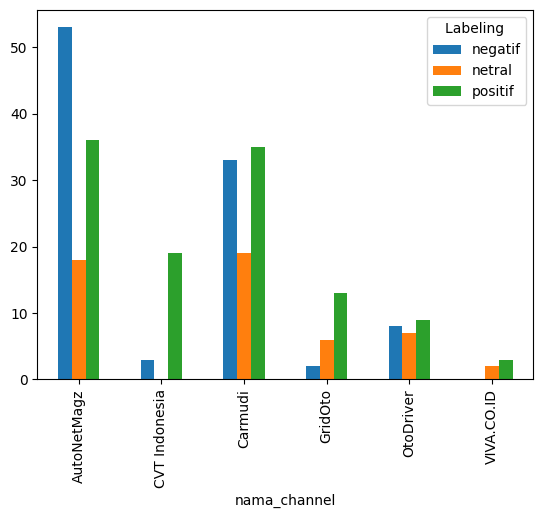

In [144]:
sentimen_tiap_channel = pd.pivot_table(index = 'nama_channel', columns = 'Labeling ', aggfunc = 'size', data = df, fill_value = 0)

sentimen_tiap_channel.plot(kind = 'bar')

**WordCloud Tiap Sentimen**

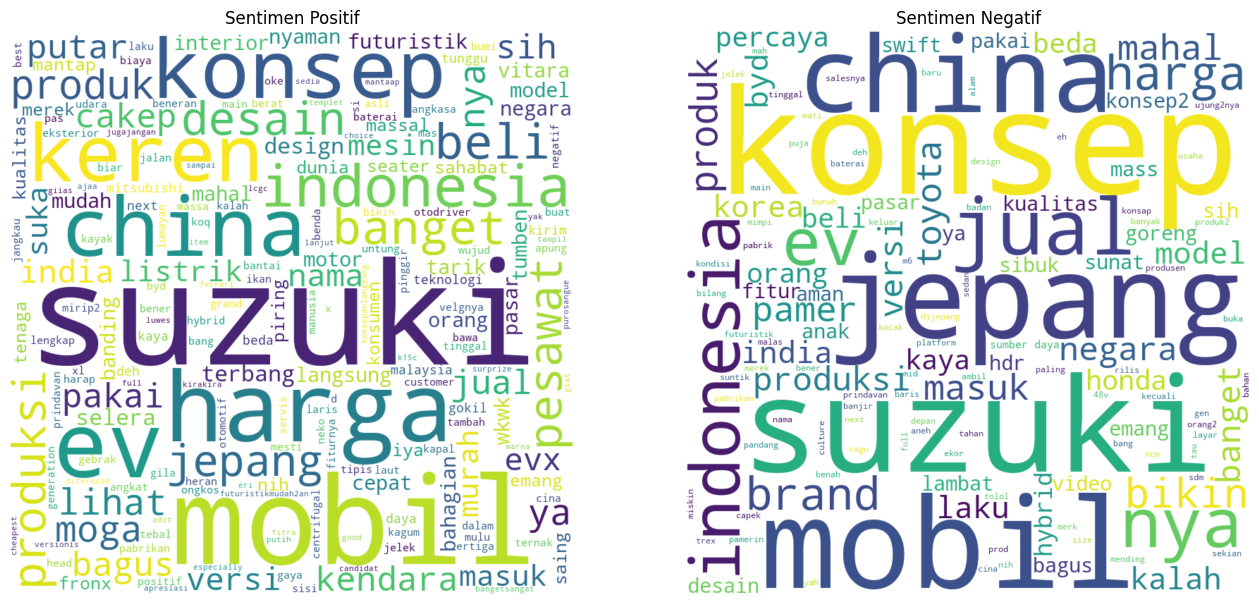

In [145]:
from wordcloud import WordCloud

data_positif = data[data['Labeling '] == 'positif']
data_negatif = data[data['Labeling '] == 'negatif']

text_positif = ' '.join(data_positif["clean_text"].values.tolist())

text_negatif = ' '.join(data_negatif["clean_text"].values.tolist())

wordcloud_positif = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(text_positif)

wordcloud_negatif = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(text_negatif)

plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('Sentimen Positif')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('Sentimen Negatif')
plt.axis('off')

plt.show()


**Splitting Data**

In [146]:
#memisahkan menjadi 2 bagian yaitu 20% data uji 80% data latih
from sklearn.model_selection import train_test_split

X_raw = data["clean_text"]
y_raw = data["Labeling "]
X_train, X_test, y_train, y_test = train_test_split(X_raw.values, y_raw.values, test_size=0.2, random_state=42, stratify = y_raw)

**Feature Extracting**

In [147]:
#tahap merubah data menjadi bilangan vektor
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [177]:
X_train_TFIDF = vectorizer.transform(X_train).toarray()
X_test_TFIDF = vectorizer.transform(X_test).toarray()
X = vectorizer.transform(data["clean_text"]).toarray()
kolom = vectorizer.get_feature_names_out()
train_tf_idf = pd.DataFrame(X_train_TFIDF, columns=kolom)
test_tf_idf = pd.DataFrame(X_test_TFIDF, columns=kolom)
train_tf_idf.head()

,0429,0429 susah,100,100 beli,100 ton,11000,11000 unit,1112,1112 daihatsu,12v,...,yak,yaris,yaris cross,yen,yen anjlok,yh,yup,yup mazda,zennix,zennix badan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Plot TF-IDF**

In [178]:
colors = sn.color_palette("viridis", n_colors = 3)

- **Top 10 Kata Kunci dengan Nilai Rata-rata TF-IDF (Data Training)**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'mobil'),
  Text(1, 0, 'suzuki'),
  Text(2, 0, 'konsep'),
  Text(3, 0, 'keren'),
  Text(4, 0, 'harga'),
  Text(5, 0, 'ev'),
  Text(6, 0, 'china'),
  Text(7, 0, 'banget'),
  Text(8, 0, 'produk'),
  Text(9, 0, 'jual')])

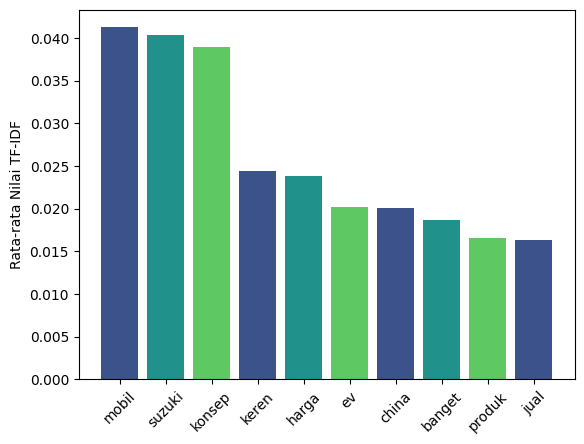

In [179]:
mean_tfidf = train_tf_idf.mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots()

ax.bar(mean_tfidf.index, mean_tfidf.values, color = colors)
ax.set_ylabel('Rata-rata Nilai TF-IDF')

plt.xticks(rotation = 45)

- **Top 10 Kata Kunci dengan Nilai Rata-rata TF-IDF (Data Testing)**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'suzuki'),
  Text(1, 0, 'konsep'),
  Text(2, 0, 'nya'),
  Text(3, 0, 'harga'),
  Text(4, 0, 'mobil'),
  Text(5, 0, 'ya'),
  Text(6, 0, 'versi'),
  Text(7, 0, 'keren'),
  Text(8, 0, 'india'),
  Text(9, 0, 'ev')])

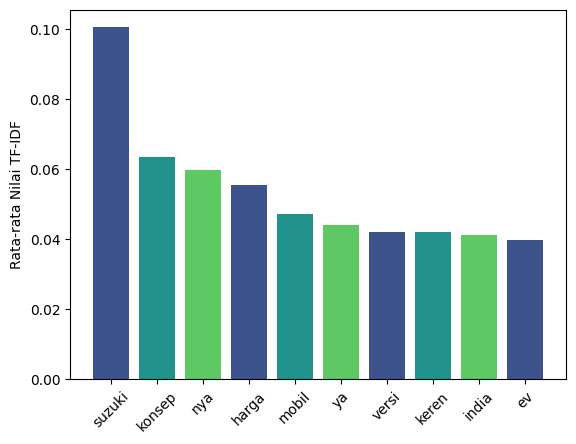

In [180]:
mean_tfidf = test_tf_idf.mean().sort_values(ascending=False).head(10)

fig, ax = plt.subplots()
    
ax.bar(mean_tfidf.index, mean_tfidf.values, color = colors)
ax.set_ylabel('Rata-rata Nilai TF-IDF')
plt.xticks(rotation = 45)

**Feature Selection dengan k = 500**

- **Proses Pemilihan 500 Feature**

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=500)
X_kbest_features = chi2_features.fit_transform(train_tf_idf, y_train)

print('Banyaknya fitur awal:', train_tf_idf.shape[1])
print('banyaknya fitur setelah di seleksi:', X_kbest_features.shape[1])


Banyaknya fitur awal: 2214
banyaknya fitur setelah di seleksi: 500


In [153]:
selected_feature_names = [kolom[i] for i in chi2_features.get_support(indices=True)]

# Create a DataFrame with the selected features
selected_train_tf_idf = pd.DataFrame(X_kbest_features, columns=selected_feature_names)

# Save the DataFrame to an Excel file
selected_train_tf_idf.to_excel('selected_TF_IDF_features_sastrawi.xlsx', index=False)

- **Confusion Matrix dari data 500 Feature**

In [182]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 10.0, fit_intercept = False)
lr.fit(X_kbest_features, y_train)

LogisticRegression(C=10.0, fit_intercept=False)

              precision    recall  f1-score   support

     negatif       0.79      0.75      0.77        20
     positif       0.79      0.83      0.81        23

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



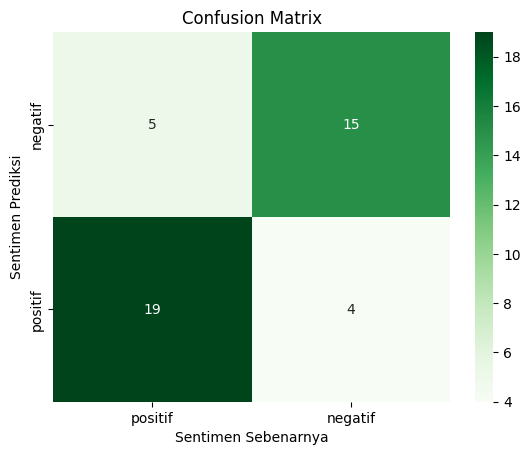

In [183]:
from sklearn.metrics import classification_report,confusion_matrix

# Transformasi data uji menggunakan chi2_features
X_test_chi2 = chi2_features.transform(X_test_TFIDF)

# Prediksi label untuk data uji
y_pred = lr.predict(X_test_chi2)

print(classification_report(y_test, y_pred))

kolom = ['negatif', 'positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confm, index=kolom, columns=kolom)

ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt=".0f")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Sentimen Sebenarnya')
ax.set_ylabel('Sentimen Prediksi')

ax.invert_xaxis()

plt.show()

**Eksperimen Feture Selection dari 10-1999**

In [184]:
from sklearn.metrics import accuracy_score,f1_score

k_feature_acc = 0
k_feature_f1 = 0
max_acc = 0
max_f1 = 0

k = []
acc = []
f1 = []

# Loop untuk memilih fitur terbaik dan menghitung skor
for feature in tqdm(range(10, 2000)):
    chi2_features = SelectKBest(chi2, k=feature)
    X_kbest_features = chi2_features.fit_transform(train_tf_idf.values, y_train)

    # Inisialisasi dan latih model Naive Bayes
    lr = LogisticRegression(C = 10.0, fit_intercept = False)
    lr.fit(X_kbest_features, y_train)

    # Transformasi data uji menggunakan chi2_features
    X_test_ch2 = chi2_features.transform(X_test_TFIDF)

    # Prediksi label untuk data uji
    y_pred = lr.predict(X_test_ch2)

    # Hitung akurasi dan F1-Score
    acc_temp = accuracy_score(y_test, y_pred)
    f1_temp = f1_score(y_test, y_pred, average="weighted")
    
    k.append(feature)
    acc.append(acc_temp)
    f1.append(f1_temp)

    # Update hasil terbaik jika ditemukan skor yang lebih tinggi
    if max_acc < acc_temp:
        max_acc = acc_temp
        k_feature_acc = feature
    if max_f1 < f1_temp:
        max_f1 = f1_temp
        k_feature_f1 = feature

# Cetak hasil terbaik
print(f"Accuracy terbaik adalah {max_acc} dengan banyaknya fitur {k_feature_acc}")
print(f"F1-Score terbaik adalah {max_f1} dengan banyaknya fitur {k_feature_f1}")

100%|██████████| 1990/1990 [00:45<00:00, 43.60it/s]

Accuracy terbaik adalah 0.8372093023255814 dengan banyaknya fitur 1543
F1-Score terbaik adalah 0.8368540580316928 dengan banyaknya fitur 1543


**Plot Accuracy dan F1-Score tiap K-Feature**

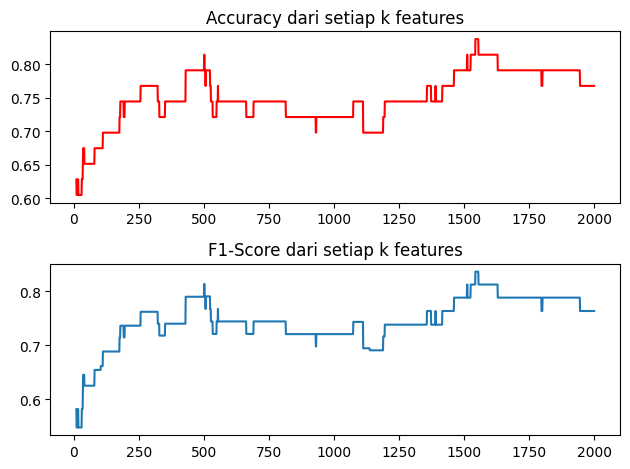

In [185]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(k, acc, color = 'red')
ax[0 ].set_title('Accuracy dari setiap k features')

ax[1].plot(k, f1)
ax[1].set_title('F1-Score dari setiap k features')

plt.tight_layout()


**Feature Selection dengan K = 1543 (Hasil Eksperimen)**

Banyaknya fitur awal: 2214
Banyaknya fitur setelah diseleksi: 1543
              precision    recall  f1-score   support

     negatif       0.84      0.80      0.82        20
     positif       0.83      0.87      0.85        23

    accuracy                           0.84        43
   macro avg       0.84      0.83      0.84        43
weighted avg       0.84      0.84      0.84        43



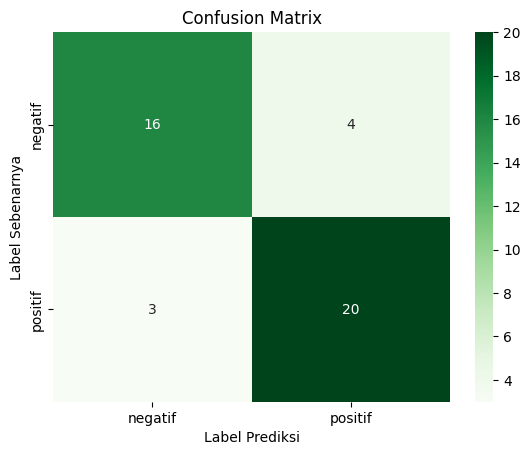

In [186]:
chi2_features = SelectKBest(chi2, k=k_feature_f1)
X_kbest_features = chi2_features.fit_transform(train_tf_idf.values, y_train)

print('Banyaknya fitur awal:', train_tf_idf.shape[1])
print('Banyaknya fitur setelah diseleksi:', X_kbest_features.shape[1])

# Inisialisasi dan latih model Naive Bayes
lr = LogisticRegression(C = 10.0, fit_intercept = False)
lr.fit(X_kbest_features, y_train)

# Transformasi data uji menggunakan chi2_features
X_test_ch2 = chi2_features.transform(X_test_TFIDF)

# Prediksi label untuk data uji
y_pred = lr.predict(X_test_ch2)

accuracy_nb = accuracy_score(y_test, y_pred)

# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

# Buat confusion matrix
columns = ['negatif', 'positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confm, index=columns, columns=columns)

# Plot confusion matrix menggunakan seaborn
ax = sn.heatmap(df_cm, cmap='Greens', annot=True, fmt=".0f")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Label Prediksi')
ax.set_ylabel('Label Sebenarnya')

# Tampilkan plot
plt.show()